# Curso Data Science Parte I - Primera Entrega Trabajo Final

### Fraud Detection - Transacciones Bancarias

##### Este análisis se enfoca en un conjunto de datos detallado de transacciones bancarias, abarcando tanto las operaciones de débito como las de crédito realizadas por los clientes del mismo. La información incluye ciertos detalles que permiten una comprensión profunda de cada transacción financiera. Entre estos detalles se encuentran el monto, la fecha y hora en que se llevó a cabo, la ubicación geográfica desde donde se originó, el identificador único del dispositivo utilizado para realizar la operación, la identificación del comerciante que realizó el cobro y las características demográficas y laborales del titular de la cuenta. Adicionalmente, el dataset posee indicadores como el tipo de operación (crédito o débito) y el canal a través del cual se ejecutó (ya sea online, a través de un cajero automático o en una sucursal física).

##### El objetivo de este análisis es la identificación de patrones de comportamiento de los clientes y la detección de posibles anomalías que puedan servir como señales de actividades fraudulentas. A través de una exploración de estas variablesy sus correlaciones, se busca poder detectar insights importantes que contribuyan a la mejora de las estrategias de detección y prevención del fraude bancario. La capacidad de distinguir a las transacciones legítimas de aquellas que podrían ser posible fraude es fundamental para proteger tanto al banco como a sus clientes.

#### Las variables que integran este dataset son las siguientes:
###### * TransactionID: ID único por transacción.
###### * AccountID: ID único para cada cuenta, con múltiples transacciones por cuenta.
###### * TransactionAmount: monto en dolares de cada transacción.
###### * TransactionDate: fecha y hora de la transacción.
###### * TransactionType: Tipo de transacción, puede ser 'Credit' (Crédito) o 'Debit' (Débito).
###### * Location: Ubicación geográfica de la transacción, representada por nombres de ciudades de EE. UU.
###### * DeviceID: ID para los dispositivos utilizados para realizar la transacción.
###### * IP Address: Dirección IP asociada con la transacción.
###### * MerchantID: ID único para los comercios, mostrando comerciantes preferidos y atípicos para cada cuenta.
###### * AccountBalance: Saldo en la cuenta después de la transacción, con correlaciones lógicas basadas en el tipo y el monto de la transacción.
###### * PreviousTransactionDate: Marca de tiempo de la última transacción para la cuenta, lo que ayuda a calcular la frecuencia de las transacciones.
###### * Channel: Canal a través del cual se realizó la transacción (p. ej., Online, ATM, Branch).
###### * CustomerAge: Edad del titular de la cuenta, con agrupaciones lógicas basadas en la ocupación.
###### * CustomerOccupation: Ocupación del titular de la cuenta (p. ej., Doctor, Engineer, Student, Retired), lo que refleja patrones de ingresos.
###### * TransactionDuration: Duración de la transacción en segundos, que varía según el tipo de transacción.
###### * LoginAttempts: Número de intentos de inicio de sesión antes de la transacción, con valores más altos que indican posibles anomalías.

#### En base a esta información, buscaremos contestar las siguientes preguntas:
###### * ¿Cómo pordríamos distinguir un comportamiento "Normal" de uno "Anormal"?
###### * ¿Puede decirnos algo la cantidad de transacciónes por cuenta?
###### * ¿Puede haber una cantidad muy grande de transacciones pequeña que puedan ser fraude?
###### * ¿Existe alguna correlación entre edad, ocupación, montos, cantidad de transacciones o promedio de transacciones por día?
###### * ¿Es la ubicación Geográfica un factor que nos indique una correlación con el resto de las variables?


##### Para contestar estas preguntas, estructuraremos nuestro análisis en varias etapas clave. Inicialmente, procederemos a la importación de todas las librerias de Python que se consideren necesarias para llevar esta actividad adelante. A continuación, llevaremos a cabo un exhaustivo Análisis Exploratorio de Datos (EDA, por sus siglas en inglés), una fase clave que nos permitirá entender con mayor profundidad la estructura, las características y las particularidades de nuestro dataset. Finalmente, nos apoyaremos en la visualización de datos para representar la información de manera clara y concisa, facilitando así la identificación de patrones relevantes que puedan pasar desapercibidos en un análisis sólo numérico. Este enfoque nos permitirá maximizar las posibilidades de detectar indicios de fraude y contribuir a la seguridad de la institución.


#### Importación de librerías de Python:

In [85]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

#### Con la ayuda de Pandas y Github, ejecutamos un "pd.read_csv" tomando como referencia la ruta "RAW" del .csv correspondiente al dataset, alojado en el repositorio que previamente habíamos creado.

In [88]:
url_del_dataset = 'https://raw.githubusercontent.com/lge93/proyecto_ds_coder/refs/heads/main/bank_transactions_data.csv'

df = pd.read_csv(url_del_dataset)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


##### Revisamos con ".info()" la cantidad de columnas y registros que tiene el dataset y vemos que contiene 16 columnas y 2512 registros. Además podemos ver que no existen valores nulos en este conjunto de datos.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

##### Con la función ".describe()" veremos un resumen de los estadísticos principales sobres las variables numéricas del set de datos.

In [93]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


##### Estos indicadores estadísticos ya nos están dando muchos datos, por ejemplo, vemos que la desviación estándar del TransactionAmount es casi idéntico al promedio, por lo que podemos decir que hay una gran dispersión, o sea valores alejados de la media. Además también podemos ver que los valores máximo y mínimo están muy alejados del promedio lo que también nos indica que hay outliers o valores atípicos.

##### Siguiendo con la edad de los clientes vemos que el promedio está en los 45 años, la edad mínima está en 18 y el máximo en 80, lo cual nos indica que tenemos una buena variedad rangos etarios, esto nos servirá para analizar el comportamiento transaccional según la edad y poder hacer comparaciones entre los mismos. 

##### En cuanto a la TransactionDuration vemos que hay mucha diferencia entre el quartil 75% que es de 161 y el máximo valor que es de 300 minutos. Duraciones más largas podrían indicar actividad fraudulenta.

##### Mismo caso con LoginAttempts (intentos de login), vemos que hasta el 75% de la muestra la cantidad de intentos es 1, pero vemos que el máximo es 5, también podría estar indicando algún indicio de actividad sospechosa.

##### En cuanto al AccountBalance (saldo de la cuenta) podemos decir que hay cuentas que tienen saldos muy pequeños (min= 100USD vs max= 15.000USD) esto podría servirnos para analizar el comportamiento entre cuentas que tienen bajos saldos vs las que tienen altos saldos, cantidad de transacciones, ubicación geográfica, rango etario, ocupación, etc.

### Histográma distribución de la cantidad de clientes por Edad

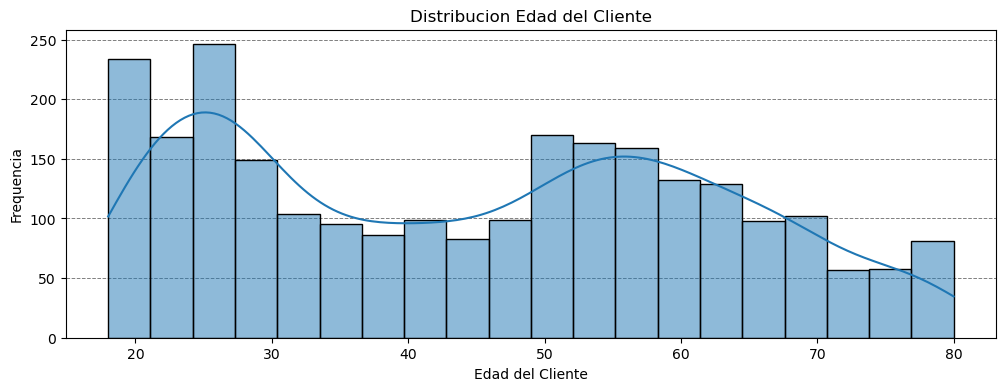

In [124]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.histplot(df['CustomerAge'], bins=20, kde=True)
ax.set_title('Distribucion Edad del Cliente')
ax.set_xlabel('Edad del Cliente')
ax.set_ylabel('Frequencia')
ax.set_axisbelow(True)
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)